<center><h1>ML Lab2 Topic: Data Preprocessing</h1></center>
<center><h3>Arush Sharma 16bce1127</h3></center>

<p> In this lab, we will working on cleaning the dataset, and visualizing it for finding any discrepancies.</p>
<p>We have a dataset given in the class, and our chosen dataset which we have to clean</p>   

In [98]:
import pandas as pd
import seaborn as sb

In [99]:
iris_data=pd.read_csv("iris-data.csv")

In [100]:
iris_data.describe() 
#sb.pairplot(iris_data, hue='class')

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm
count,150.000000,150.000000,150.000000,145.000000
mean,5.644627,3.054667,3.758667,1.236552
std,1.312781,0.433123,1.764420,0.755058
min,0.055000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.400000
50%,5.700000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [101]:
print(iris_data.head())

   sepal_length_cm  sepal_width_cm  petal_length_cm  petal_width_cm  \
0              5.1             3.5              1.4             0.2   
1              4.9             3.0              1.4             0.2   
2              4.7             3.2              1.3             0.2   
3              4.6             3.1              1.5             0.2   
4              5.0             3.6              1.4             0.2   

         class  
0  Iris-setosa  
1  Iris-setosa  
2  Iris-setosa  
3  Iris-setosa  
4  Iris-setosa  


In [102]:
#In C we would have an array of just a single datatype. Here in pandas/python, we have multiple datatypes in the same array/dataFrame
print(iris_data['sepal_length_cm'].dtype)
print(iris_data['class'].dtype)
import warnings
warnings.filterwarnings("ignore")

float64
object


<h4> Using pairplot function to plot, and using dropna function to drop NaN values</h4>

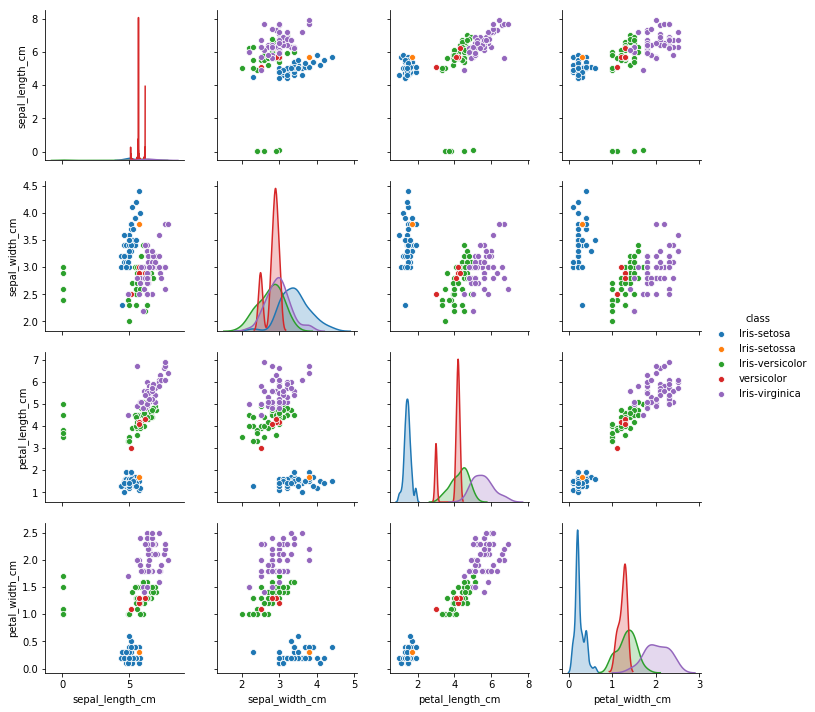

In [103]:
sb.pairplot(iris_data.dropna(axis=0), hue='class')

In [104]:
iris_data.loc[iris_data['class'] =='versicolor', 'class'] = 'Iris-versicolor'
iris_data.loc[iris_data['class'] =='Iris-setossa', 'class'] ='Iris-setosa'

In [105]:
iris_data['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

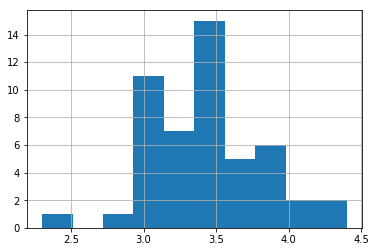

In [106]:
#Re-plot the data with corrected data entries
iris_data.loc[iris_data['class'] == 'Iris-setosa', 'sepal_width_cm'].hist()

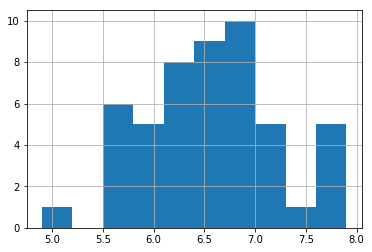

In [107]:
iris_data.loc[iris_data['class'] == 'Iris-virginica', 'sepal_length_cm'].hist()

In [108]:
iris_data.loc[iris_data['sepal_length_cm'].isnull()|
              iris_data['sepal_width_cm'].isnull()|
              iris_data['petal_length_cm'].isnull()|
              iris_data['petal_width_cm'].isnull()]           #Get rows with NA values

,sepal_length_cm,sepal_width_cm,petal_length_cm,petal_width_cm,class
7,5.0,3.4,1.5,NaN,Iris-setosa
8,4.4,2.9,1.4,NaN,Iris-setosa
9,4.9,3.1,1.5,NaN,Iris-setosa
10,5.4,3.7,1.5,NaN,Iris-setosa
11,4.8,3.4,1.6,NaN,Iris-setosa


<h4>Fill the NaN values for 'petal-width-cm' with the mean value</h4>

In [109]:
average_petal_width = iris_data.loc[(iris_data['class'] == 'Iris-setosa', 'petal_width_cm')].mean()
iris_data.loc[(iris_data['class']=='Iris-setosa') & (iris_data['petal_width_cm']).isnull(), 'petal_width_cm'] = average_petal_width

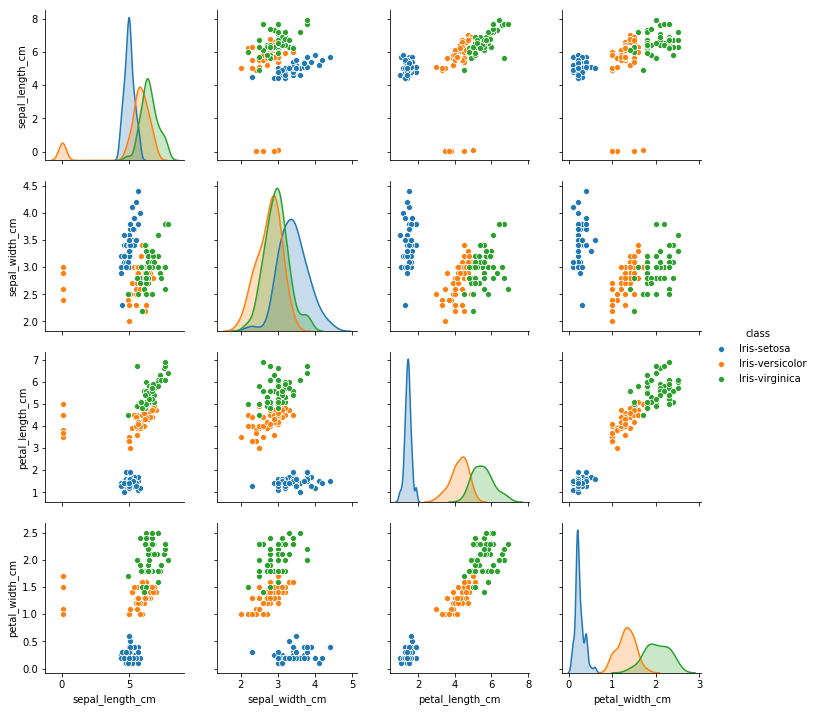

In [110]:
sb.pairplot(iris_data.dropna(), hue='class')

In [112]:
iris_data.to_csv("Iris_datapreprocessed.csv",sep=',')
iris_data.isnull().sum()

sepal_length_cm    0
sepal_width_cm     0
petal_length_cm    0
petal_width_cm     0
class              0
dtype: int64

<h1>Implementation on my dataset</h1>

<p>In this experiment, I will preprocessing on my dataset, which is Melbourne Housing dataset.</p>

In [79]:
import pandas as pd
housing_data = pd.read_csv("Melbourne_housing_FULL.csv")

<p>Getting the shape of the dataset</p>

In [80]:
housing_data.shape

(34857, 21)

<h4>Description of dataset</h4>

In [81]:
housing_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,34857.000000,2.724700e+04,34856.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,15551.000000,26881.000000,26881.000000,34854.000000
mean,3.031012,1.050173e+06,11.184929,3116.062859,3.084647,1.624798,1.728845,593.598993,160.25640,1965.289885,-37.810634,145.001851,7572.888306
std,0.969933,6.414671e+05,6.788892,109.023903,0.980690,0.724212,1.010771,3398.841946,401.26706,37.328178,0.090279,0.120169,4428.090313
min,1.000000,8.500000e+04,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1196.000000,-38.190430,144.423790,83.000000
25%,2.000000,6.350000e+05,6.400000,3051.000000,2.000000,1.000000,1.000000,224.000000,102.00000,1940.000000,-37.862950,144.933500,4385.000000
50%,3.000000,8.700000e+05,10.300000,3103.000000,3.000000,2.000000,2.000000,521.000000,136.00000,1970.000000,-37.807600,145.007800,6763.000000
75%,4.000000,1.295000e+06,14.000000,3156.000000,4.000000,2.000000,2.000000,670.000000,188.00000,2000.000000,-37.754100,145.071900,10412.000000
max,16.000000,1.120000e+07,48.100000,3978.000000,30.000000,12.000000,26.000000,433014.000000,44515.00000,2106.000000,-37.390200,145.526350,21650.000000


<h4>Getting the sum of null values under each column</h4>

In [82]:
#housing_data.describe()
housing_data.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

<p>We can see there are thousands of null values in some of columns, we will remove them in next steps</p>

<h4>Removing the columns where number of null values is too high(>11000)</h4>

In [83]:
housing_data=housing_data.drop(columns=['BuildingArea'], axis = 1)
housing_data=housing_data.drop(columns=['YearBuilt'], axis = 1)
housing_data=housing_data.drop(columns=['Address'],axis=1)

In [84]:
housing_data.shape

(34857, 18)

<h4>Removing all the rows where Price is null</h4>

In [85]:
housing_data=housing_data.dropna(subset=['Price'])

In [86]:
housing_data.isnull().sum()

Suburb              0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            1
Postcode            1
Bedroom2         6441
Bathroom         6447
Car              6824
Landsize         9265
CouncilArea         3
Lattitude        6254
Longtitude       6254
Regionname          3
Propertycount       3
dtype: int64

In [87]:
import numpy as np
import matplotlib.pyplot as plt
#housing_data[housing_data['SellerG'].value_count()!=1]
#housing_data.groupby(['SellerG']).size()
#housing_data2=housing_data.copy()
#print(housing_data2)
#housing_data2.loc[housing_data2['SellerG'] == 'Nelson']
#housing_data2=housing_data.loc[housing_data2['SellerG'] == 'Nelson']
#plt.scatter(housing_data['SellerG'],housing_data['Price'])
#housing_data=housing_data.dropna(subset=['Bathroom'])

<h4>Deleting all the rows where Lattitude, Car, Landsize is null</h4>

In [88]:
housing_data=housing_data.dropna(subset=['Lattitude'])
housing_data=housing_data.dropna(subset=['Car'])
housing_data=housing_data.dropna(subset=['Landsize'])
housing_data.shape

(17679, 18)

<h4>Now checking the null values under each columns</h4>

In [89]:
housing_data.isnull().sum()

Suburb           0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

<h4>We can see all the null values under every column has been removed</h4>

In [97]:
housing_data.to_csv('Housing-data.csv',sep=',')

<h4>Now plotting the data to get an idea of data.</h4>

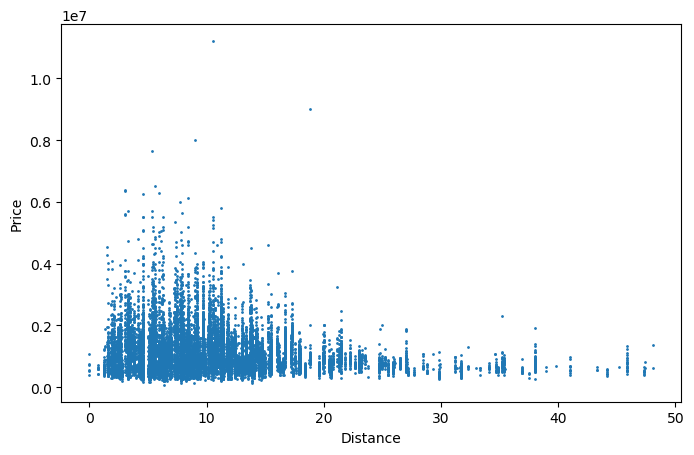

In [93]:
from matplotlib.pyplot import figure
figure(num=None, figsize=(8,5), dpi=100, facecolor='w', edgecolor='k')
plt.xlabel('Distance')
plt.ylabel('Price')
plt.scatter(housing_data['Distance'],housing_data['Price'],s=1)

<h4> Applying pairplot function</h4>

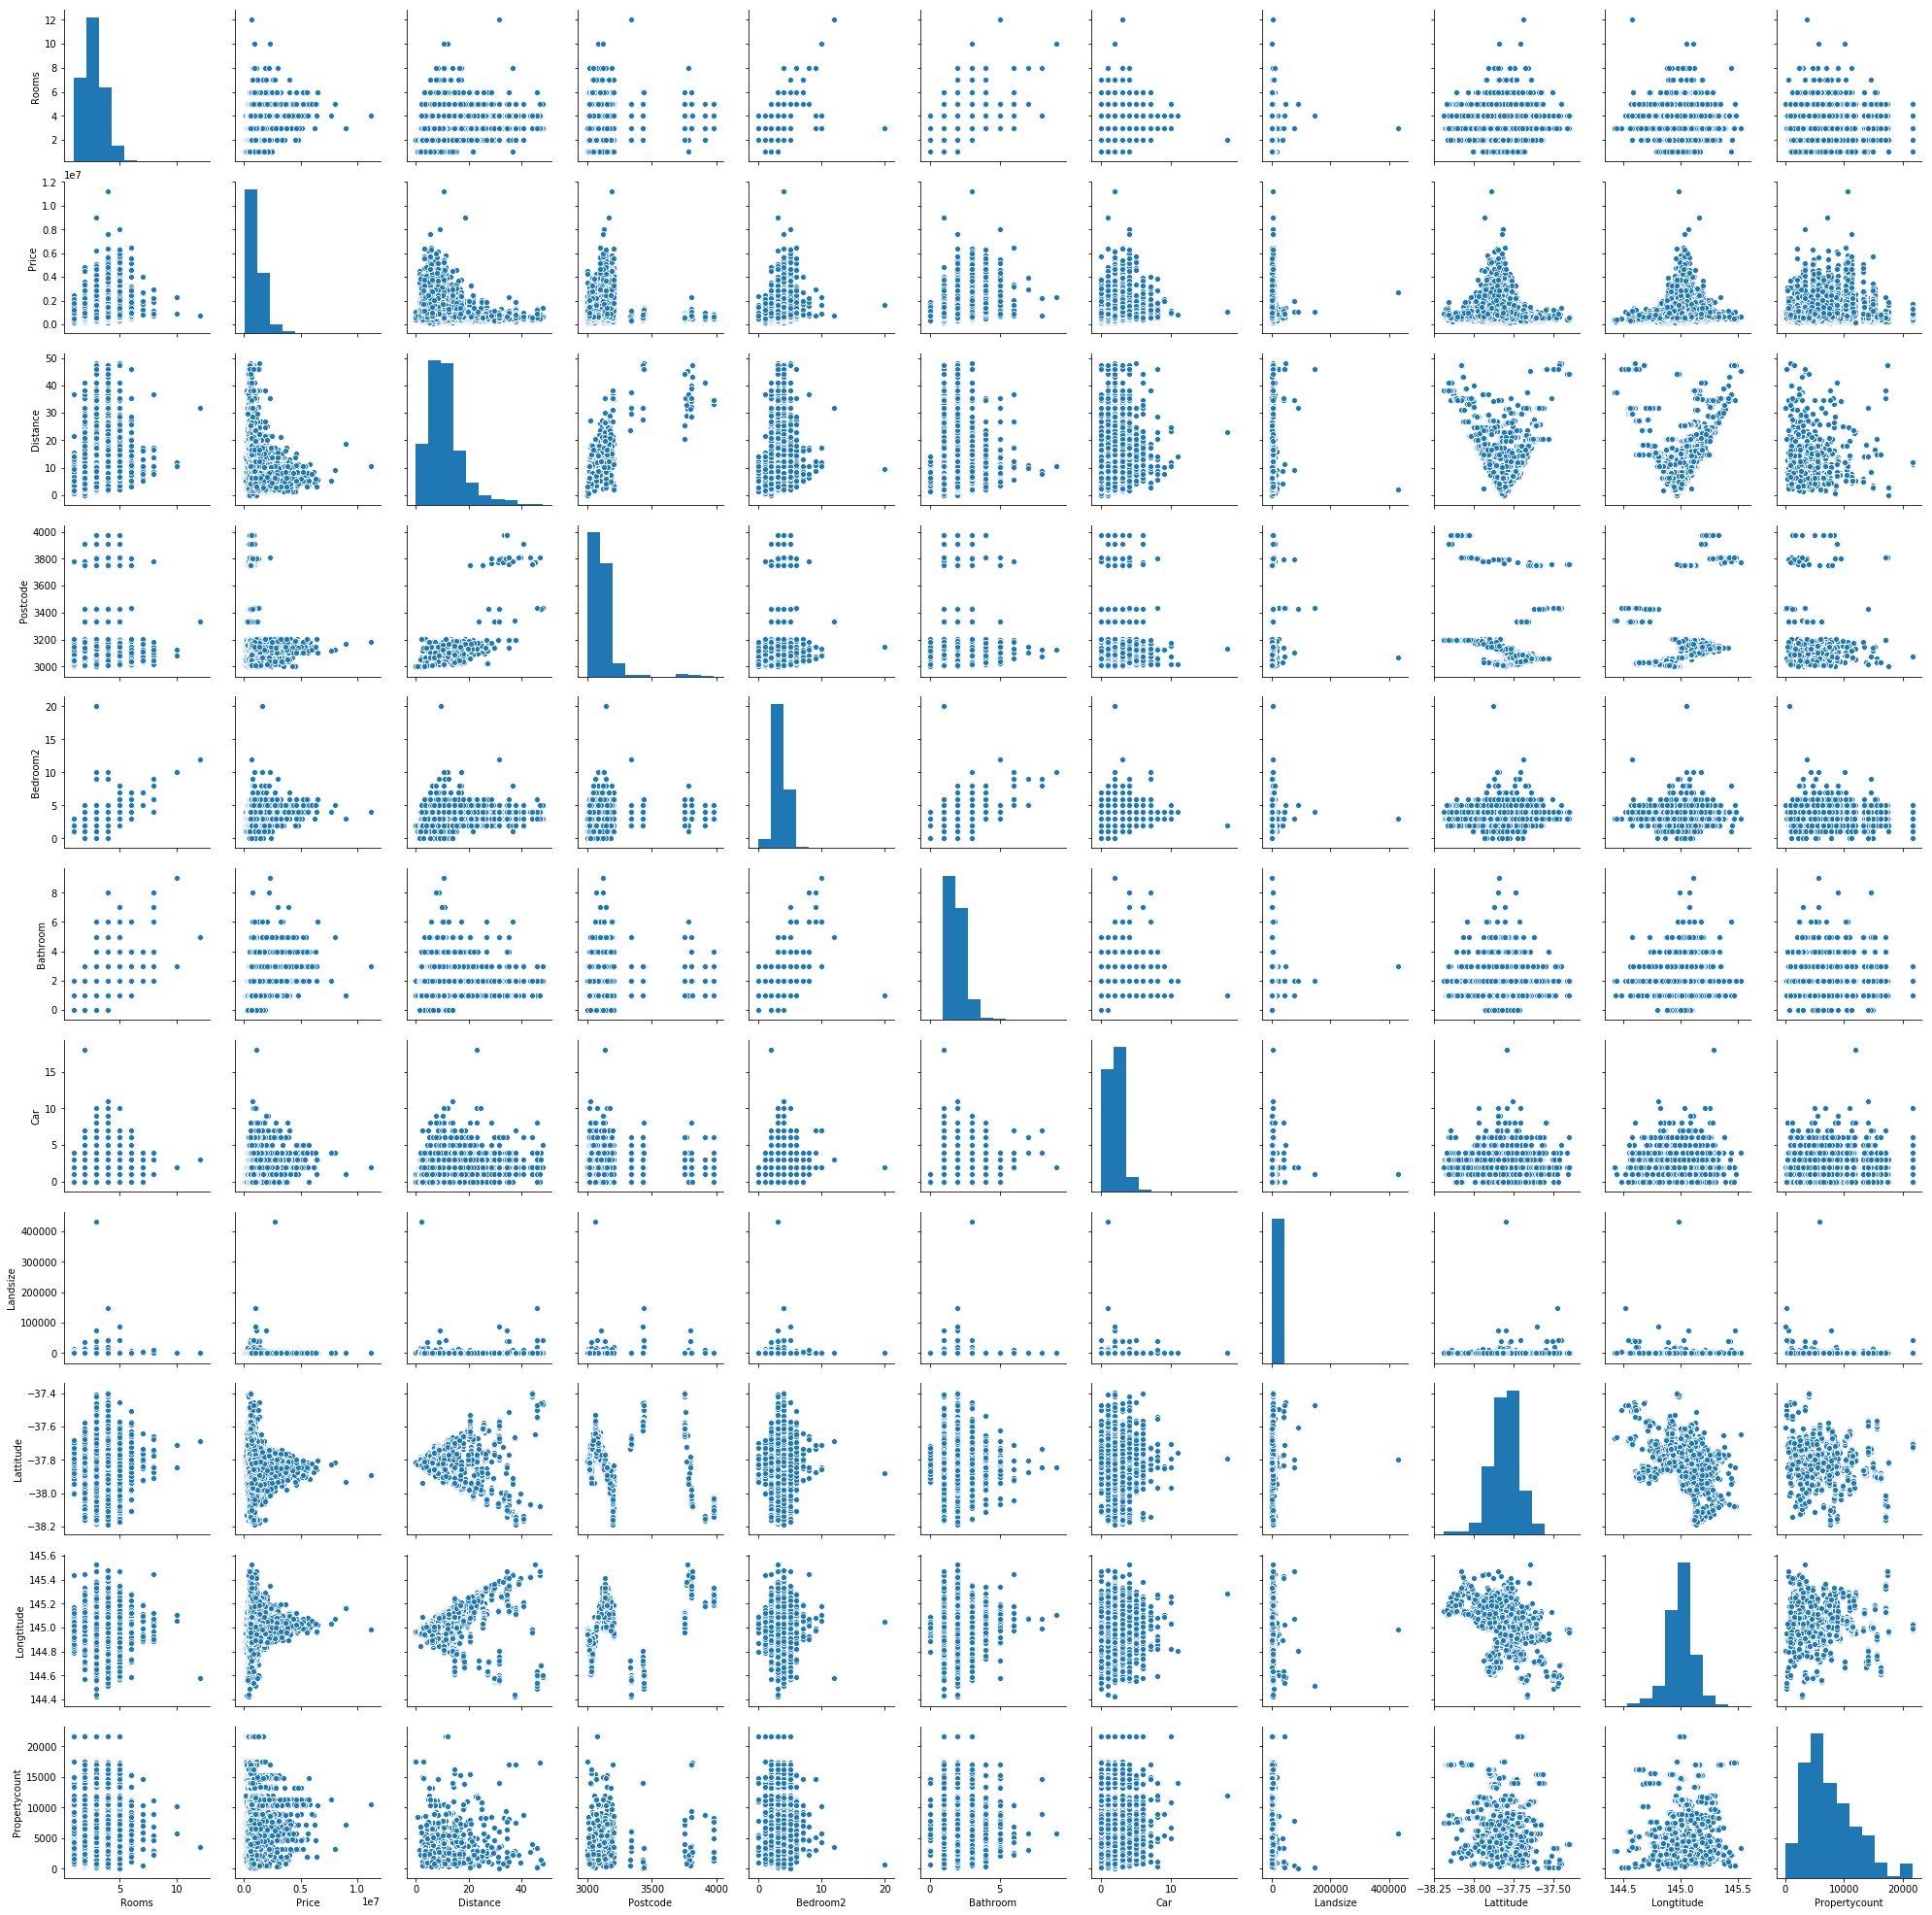

In [96]:
sb.pairplot(housing_data)